x:  [ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8

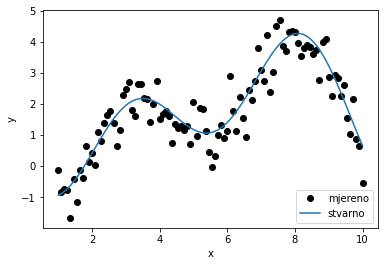

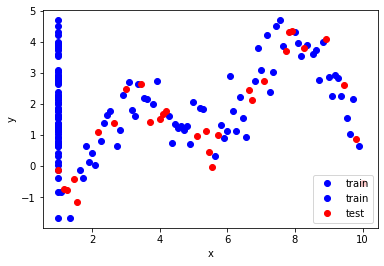

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

#drugi zadatak
def CalculateParmLinModel(xtrain, ytrain):
    xtrain_T = np.transpose(xtrain)
    x_T_X = np.matmul(xtrain_T, xtrain)
    x_T_X_inv = np.linalg.inv(x_T_X)
    x_T_X_inv_X_T= np.matmul(x_T_X_inv, xtrain_T)
    solution = np.matmul(x_T_X_inv_X_T, ytrain)
    return solution

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
print('x: ', x)
print('y_true: ', y_true)
print('y_measured: ', y_measured)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12) #postavljeni da dobijemo ista rješenja
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

#hstack za train

#xtrain = x[indeksi_train]
#ones = np.ones((len(xtrain),1), dtype = float)
#xtrain = np.hstack((ones, xtrain))
#print("-----: ", xtrain)
#ytrain = y_measured[indeksi_train]
#theta_ML = CalculateParmLinModel(xtrain,ytrain)
#print("ThetaML: ", theta_ML)

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', theta_ML[0], '+', theta_ML[1] ,'*x')

#intercept_ theta nula
#ytest_p = linearModel.predict(xtest)
#MSE_test = mean_squared_error(ytest, ytest_p)

#plt.figure(3)
#plt.plot(xtest,ytest_p,'og',label='predicted')
#plt.plot(xtest,ytest,'or',label='test')
#plt.legend(loc = 4)

#x_pravac = np.array([1,10])
#x_pravac = x_pravac[:, np.newaxis]
#y_pravac = linearModel.predict(x_pravac)
#plt.plot(x_pravac, y_pravac)


y_hat = [0.14214743] + [0.32259462] * x


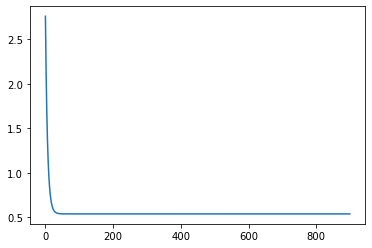

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

def line(x, theta):

    return theta[1]*x + theta[0]

def Jfunc(x,y,theta):
    J = 0.0
    n = x.shape[0]
    for i in range(0,n):
        J += (line(x[i],theta) - y[i]) ** 2
    
    J /= (2*n)

    return J

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

#gradijenti spust

no_iter = 900
theta_old = np.zeros((2,1))
theta_new = np.zeros((2,1))
step = 0.05
J = np.zeros((no_iter,1))

plt.figure()

for i in range(0, no_iter):
    J[i] = Jfunc(xtrain,ytrain,theta_old)
        
    rj0 = 0.0
    rj1 = 0.0

    for i in range(0,len(xtrain)):
        rj0 += line(xtrain[i],theta_old) - ytrain[i]
        rj1 += (line(xtrain[i],theta_old) - ytrain[i]) * xtrain[i]

    rj0 /= len(xtrain)
    rj1 /= len(xtrain)

    theta_new[0] = theta_old[0] - step * rj0
    theta_new[1] = theta_old[1] - step * rj1
    theta_old = theta_new
    
plt.plot(range(0, no_iter), J)

print("y_hat = " + str(theta_new[0]) + " + " + str(theta_new[1]) + " * x")

MSE_test: [1.27450839 0.31157034 0.70390574]
MSE_train: [0.75796301 0.19556472 0.14480086]


Text(0, 0.5, 'y')

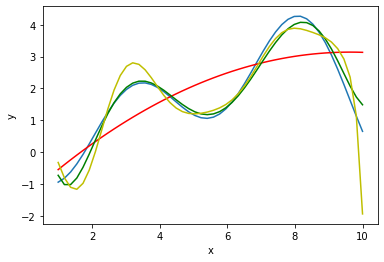

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly1 = PolynomialFeatures(degree=2)
xnew1 = poly1.fit_transform(x)

poly2 = PolynomialFeatures(degree=6)
xnew2 = poly2.fit_transform(x)

poly3 = PolynomialFeatures(degree=15)
xnew3 = poly3.fit_transform(x)
    
np.random.seed(12)
indeksi1 = np.random.permutation(len(xnew1))
indeksi_train1 = indeksi1[0:int(np.floor(0.7*len(xnew1)))]
indeksi_test1 = indeksi1[int(np.floor(0.7*len(xnew1)))+1:len(xnew1)]

np.random.seed(12)
indeksi2 = np.random.permutation(len(xnew2))
indeksi_train2 = indeksi2[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test2 = indeksi2[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

np.random.seed(12)
indeksi3 = np.random.permutation(len(xnew3))
indeksi_train3 = indeksi3[0:int(np.floor(0.7*len(xnew3)))]
indeksi_test3 = indeksi3[int(np.floor(0.7*len(xnew3)))+1:len(xnew3)]

xtrain1 = xnew1[indeksi_train1,]
xtrain2 = xnew2[indeksi_train2,]
xtrain3 = xnew3[indeksi_train3,]
ytrain1 = y_measured[indeksi_train1]
ytrain2 = y_measured[indeksi_train2]
ytrain3 = y_measured[indeksi_train3]

xtest1 = xnew1[indeksi_test1,]
xtest2 = xnew2[indeksi_test2,]
xtest3 = xnew3[indeksi_test3,]
ytest1 = y_measured[indeksi_test1]
ytest2 = y_measured[indeksi_test2]
ytest3 = y_measured[indeksi_test3]

linearModel1 = lm.LinearRegression()
linearModel1.fit(xtrain1,ytrain1)

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain2)

linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain3)

ytest_p1 = linearModel1.predict(xtest1)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)

ytrain_p1 = linearModel1.predict(xtrain1)
ytrain_p2 = linearModel2.predict(xtrain2)
ytrain_p3 = linearModel3.predict(xtrain3)

MSE_test = np.array([mean_squared_error(ytest1, ytest_p1),
                     mean_squared_error(ytest2, ytest_p2),
                     mean_squared_error(ytest3, ytest_p3)])
                    
MSE_train = np.array([mean_squared_error(ytrain1, ytrain_p1),
                     mean_squared_error(ytrain2, ytrain_p2),
                     mean_squared_error(ytrain3, ytrain_p3)])                    


print("MSE_test: " + str(MSE_test))
print("MSE_train: " + str(MSE_train))

#pozadinska funkcija vs model
plt.figure(1)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel1.predict(xnew1),'r-',label='model1')
plt.plot(x, linearModel2.predict(xnew2),'g-',label='model2') #-najbolji - stupanj 6
plt.plot(x, linearModel3.predict(xnew3),'y-',label='model3')
plt.xlabel('x')
plt.ylabel('y')